# Electricity: Prices and production from renewables in Eastern Denmark (2023)

> Dataproject for "Introduction to Programming and Numerical Analysis" 
> - Group: "a-j"

# Table of Contents

[Table of Contents](#Table-of-contents)

[Preliminaries](#Preliminaries)

[Reading data and creating variables](#Reading-data-and-creating-variables)

[Merging data sets](#Merging-data-sets)

[Finding the Market Clearing Price](#3.-Finding-the-Market-Clearing-Price)

[Exploring data](#Exploring-data)

[Analysis](#Analysis)

[Conclusion](#Conclusion)

# Preliminaries

In [1]:
import pandas as pd
import numpy as np
import requests
import matplotlib.pyplot as plt
from datetime import datetime
from scipy.stats import linregress

# autoreload modules when code is run
%load_ext autoreload
%autoreload 2

# user written modules
import dataproject


# Reading data and creating variables

The following function fetches data from two EnergiDataService API endpoints regarding electricity prices and production/consumption in the Danish Price area , processes this data to calculate total solar and wind production for each timestamp, and then exports the aggregated data to CSV files to be found in the folder.

In [2]:
# Calling function that fetches data, processes it and exports as csv in the folder
dataproject.fetch_and_process_data()

# Merging data sets

In [3]:
#Merging datasets from csv files into one dataframe
elspot_prices_df = pd.read_csv("elspot_prices.csv") 
prod_cons_df = pd.read_csv("production_consumption.csv") 

merged_df = pd.merge(elspot_prices_df, prod_cons_df, on='HourDK')

display(merged_df)

,HourDK,SpotPriceDKK,GrossConsumptionMWh,TotalSolarProductionMWh,TotalWindProductionMWh
0,2023-12-30T23:00:00,322.170013,1525.118546,0.131589,419.729230
1,2023-12-30T22:00:00,373.369995,1593.238282,0.145007,644.045047
2,2023-12-30T21:00:00,410.929993,1678.589537,0.150679,761.125555
3,2023-12-30T20:00:00,462.130005,1700.513019,0.202043,930.518013
4,2023-12-30T19:00:00,529.789978,1794.644627,0.261262,890.532999
...,...,...,...,...,...
8733,2023-01-01T04:00:00,0.370000,1252.553184,0.058265,1116.153403
8734,2023-01-01T03:00:00,0.590000,1305.203959,0.049328,1202.980320
8735,2023-01-01T02:00:00,0.670000,1332.021788,0.055293,1278.472616
8736,2023-01-01T01:00:00,10.260000,1382.532959,0.056987,1410.797757


## Exploring data

In [4]:
# Calling function that prints a table of descriptive statistics of the given data.
dataproject.print_descriptive_stats(merged_df)

,SpotPriceDKK,GrossConsumptionMWh,TotalSolarProductionMWh,TotalWindProductionMWh
count,8738.00,8738.00,8738.00,8738.00
mean,606.09,1536.25,97.48,615.58
std,373.54,290.66,161.47,484.61
min,-447.25,931.62,0.04,0.02
25%,303.62,1332.30,0.16,167.69
50%,635.08,1531.10,2.41,515.46
75%,837.94,1730.36,126.45,1040.23
max,3909.14,2521.69,666.07,1624.49


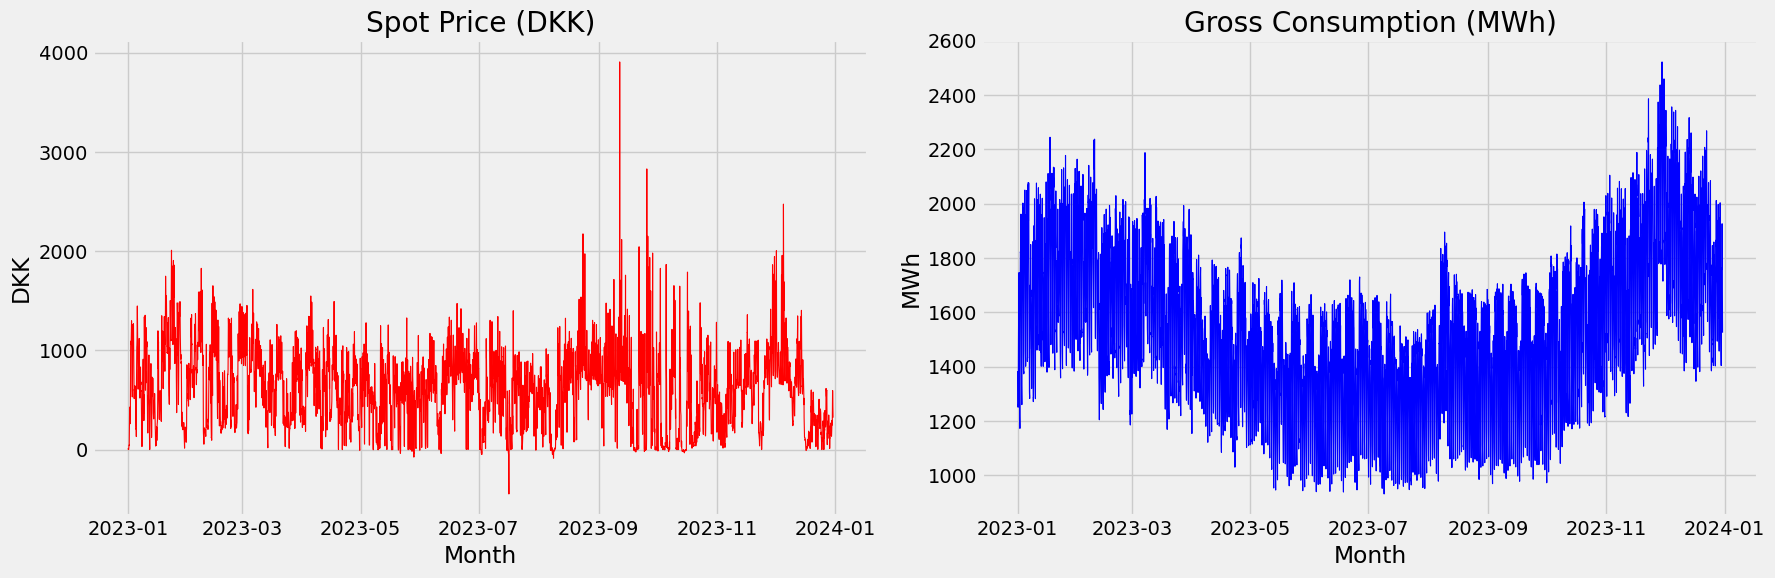

In [5]:
# Plotting the  two primary series in the data
dataproject.plot_series("elspot_prices.csv","production_consumption.csv")

The above table presents a statistical overview of Denmark's electricity data, encapsulating price, consumption, and renewable production metrics. From the table it can be seen, that spot prices for electricity (measured in DKK) has exhibited quite a high volatility, with a standard deviation at around 374 DKK, around a mean of 606 DKK. Moreover, the mean consumption of electricity has hovered around 1537 MWh. In the realm of renewable energy, the table shows that the average wind production is around 613 MWh, while the average solar production is a fair bit lower at around 97 MWh for the period.

The accompanying graphs shows the change in electricity's spot price and gross consumption from January 2023 to December 2023. While quite volatile, the spot price graphs shows a homogeneous-ish variance for the first 8 months of 2023, which then becomes quite heterogeneous and unpredictable for the last part of the period. Conversely, the consumption graph shows a more rhythmic pattern. Here the variance seems to be quite steady for the whole period, with a varying mean on a month-to-month basis, potentially mirroring seasonal demands.

# Analysis

**Calculating monthly and daily averages for all variables.**

In [6]:
# Converting the HourDK to datetime, and extracting "Month" that indicates the month of year (1 - 12)
merged_df['Month'] = pd.to_datetime(merged_df['HourDK']).dt.month

# Grouping by the month and calculating the average for each variable
average_prices_per_month = merged_df.groupby('Month')['SpotPriceDKK'].mean()
average_consumption_per_month = merged_df.groupby('Month')['GrossConsumptionMWh'].mean()
average_wind_per_month = merged_df.groupby('Month')['TotalWindProductionMWh'].mean()
average_solar_per_month = merged_df.groupby('Month')['TotalSolarProductionMWh'].mean()

# Combining the averages into a single dataframe for plotting
averages_df_monthly = pd.DataFrame({'Average Monthly Price (DKK)': average_prices_per_month,
                                    'Average Monthly Consumption (MWh)': average_consumption_per_month,
                                    'Average Monthly Wind Production (MWh)': average_wind_per_month,
                                    'Average Monthly Solar Production (MWh)': average_solar_per_month},
                                    ).reset_index()

display(averages_df_monthly.head())


# Converting the HourDK to datetime, and getting "Hour" that indicates the hour of day (0 - 23)
merged_df['Hour'] = pd.to_datetime(merged_df['HourDK']).dt.hour

# Grouping by the hour and calculate the average for each variable
average_prices_per_hour = merged_df.groupby('Hour')['SpotPriceDKK'].mean()
average_consumption_per_hour = merged_df.groupby('Hour')['GrossConsumptionMWh'].mean()
average_wind_per_hour = merged_df.groupby('Hour')['TotalWindProductionMWh'].mean()
average_solar_per_hour = merged_df.groupby('Hour')['TotalSolarProductionMWh'].mean()


# Combining the averages into a single dataframe for plotting
averages_df_daily = pd.DataFrame({'Average Daily Price (DKK)': average_prices_per_hour,
                            'Average Daily Consumption (MWh)': average_consumption_per_hour,
                            'Average Daily Wind Production (MWh)': average_wind_per_hour,
                            'Average Daily Solar Production (MWh)': average_solar_per_hour},
                            ).reset_index()

display(averages_df_daily.head())

,Month,Average Monthly Price (DKK),Average Monthly Consumption (MWh),Average Monthly Wind Production (MWh),Average Monthly Solar Production (MWh)
0,1,742.053656,1724.395189,919.633170,11.338603
1,2,749.313125,1700.716510,737.305490,38.188661
2,3,667.492759,1645.740181,699.803657,72.493026
3,4,623.272472,1460.927229,606.753216,146.091219
4,5,492.764409,1352.809008,511.983095,185.715438


,Hour,Average Daily Price (DKK),Average Daily Consumption (MWh),Average Daily Wind Production (MWh),Average Daily Solar Production (MWh)
0,0,536.410440,1320.420794,627.573545,0.154337
1,1,500.532198,1295.154371,618.942310,0.149559
2,2,484.478169,1264.474986,612.460330,0.140188
3,3,472.957692,1238.524712,599.312462,0.135258
4,4,478.956951,1218.603913,595.931009,0.229510


**Plotting monthly consumption and renewable energy production.**

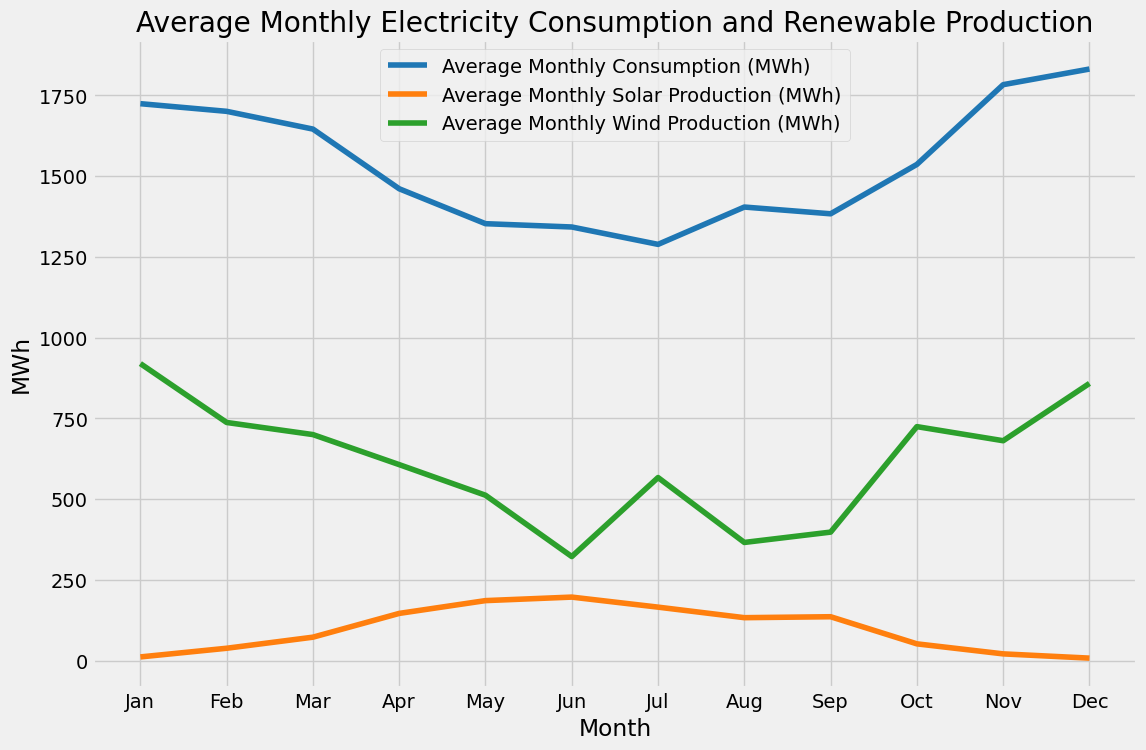

In [7]:
# Plotting based on the monthly data
fig, ax = plt.subplots(figsize=(12, 8))

ax.plot(averages_df_monthly['Month'], averages_df_monthly['Average Monthly Consumption (MWh)'], label='Average Monthly Consumption (MWh)', color='tab:blue')
ax.plot(averages_df_monthly['Month'], averages_df_monthly['Average Monthly Solar Production (MWh)'], label='Average Monthly Solar Production (MWh)', color='tab:orange')
ax.plot(averages_df_monthly['Month'], averages_df_monthly['Average Monthly Wind Production (MWh)'], label='Average Monthly Wind Production (MWh)', color='tab:green')

# Labeling
ax.set_xlabel('Month')
ax.set_xticks(range(1, 13))
ax.set_xticklabels(['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec'])
ax.set_ylabel('MWh')
ax.set_title('Average Monthly Electricity Consumption and Renewable Production')
ax.legend()

plt.show()

The above graph illustrates Denmark's monthly electricity narrative, comparing consumption with solar and wind energy production. The blue line, representing average monthly consumption, peaks in the colder months of winter and tapers off in the warmer months, indicating how the demand for electricity is driven by seasonal changes.

The orange and green lines shows Denmark's production of renewable energy throughout the months. The change in solar production, shown in orange, captures how solar energy depends on the cyclical changes in sunlight, with solar production being at its highest in the lighter summer months, and at its lowest in the darker winter months. The green line, depicting wind production, shows a similar, but inverse, seasonal relationship. Here the wind production benefits from the more windy winter months, while wind production is at its lowest in the summer months, where the wind levels are it the lowest.

**Plotting the daily variation in electricity prices, consumption and renewable energy production.**

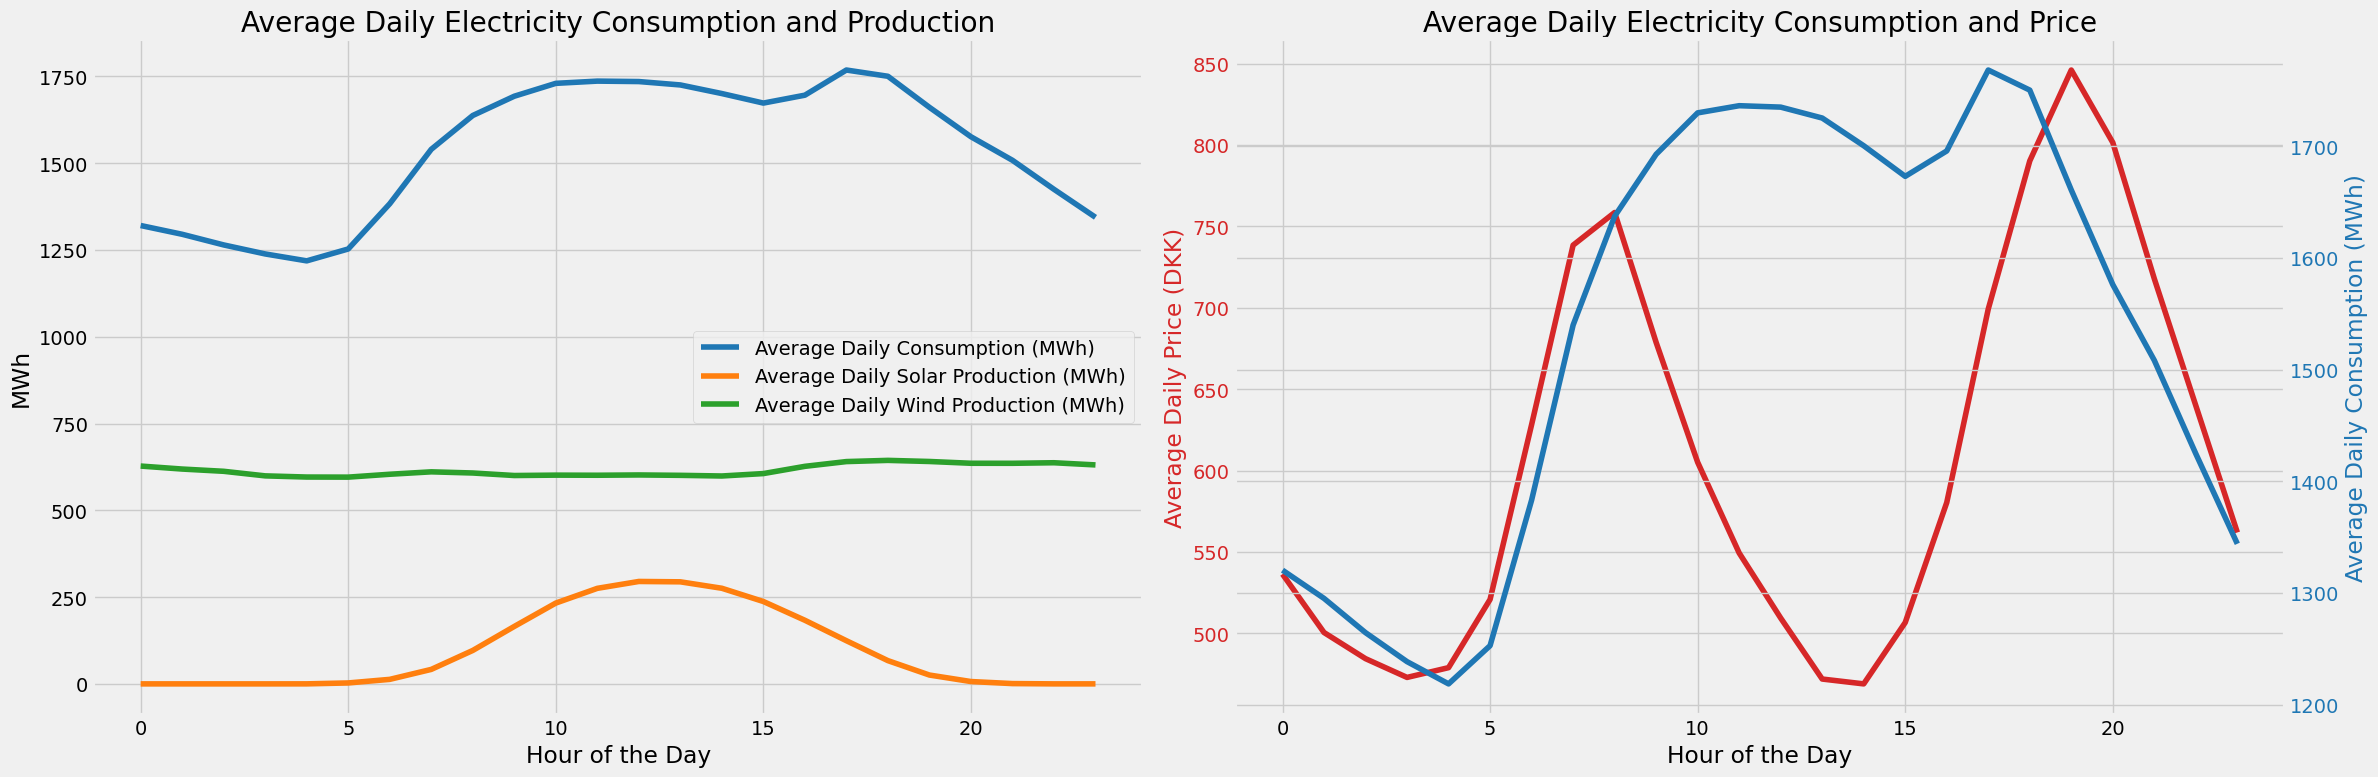

In [8]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(24, 8))

# Plot 1: Daily Consumption and Production
ax1.plot(averages_df_daily['Hour'], averages_df_daily['Average Daily Consumption (MWh)'], label='Average Daily Consumption (MWh)', color='tab:blue')
ax1.plot(averages_df_daily['Hour'], averages_df_daily['Average Daily Solar Production (MWh)'], label='Average Daily Solar Production (MWh)', color='tab:orange')
ax1.plot(averages_df_daily['Hour'], averages_df_daily['Average Daily Wind Production (MWh)'], label='Average Daily Wind Production (MWh)', color='tab:green')
ax1.set_xlabel('Hour of the Day')
ax1.set_ylabel('MWh')
ax1.set_title('Average Daily Electricity Consumption and Production')
ax1.legend()

# Plot 2: Daily Consumption and Prices
color = 'tab:red'
ax2.set_xlabel('Hour of the Day')
ax2.set_ylabel('Average Daily Price (DKK)', color=color)
ax2.plot(averages_df_daily['Hour'], averages_df_daily['Average Daily Price (DKK)'], color=color, label='Average Daily Price (DKK)')
ax2.tick_params(axis='y', labelcolor=color)

# Second y-axis for the second plot
ax22 = ax2.twinx()  
color = 'tab:blue'
ax22.set_ylabel('Average Daily Consumption (MWh)', color=color)  
ax22.plot(averages_df_daily['Hour'], averages_df_daily['Average Daily Consumption (MWh)'], color=color, label='Average Daily Consumption (MWh)')
ax22.tick_params(axis='y', labelcolor=color)

ax2.set_title('Average Daily Electricity Consumption and Price')

fig.tight_layout()  
plt.show()

The left graph illustrates the flow of average daily electricity consumption (in blue), which naturally is at its highest during the daytime hours and recedes in the nighttime. Alongside consumption, the daily production of solar energy (in orange) rises and falls according to the daylight hours, peaking at midday, which is a seasonal pattern similar to the one shown earlier in the monthly graph. In contrast, wind energy production (in green) is portrayed as a more constant force, as wind levels tend to be quite constant on a daily basis.

On the right, the daily relationship between electricity pricing (in red) and consumption (in blue) is ilustrated. For the morning, evening and night hours of the day, electricity prices and consumption seem to follow the classic supply/demand principles, as they follow very similar trends in these hours. For the hours 10-15 the supply/demand principles are seemingly no longer existent, as the price of electricity soars while the consumption remains at around the same level. One candidate explanation for this could be that this is the time of day where solar energy is at its highest. Having access to solar energy in these hours can result in a lower price, as solar energy substitutes more expensive production counterparts. Meanwhile the hours in the middle of the day are characterized by low domestic electricity consumption, which make up a significant amount of the consumption in Eastern Denmark.


**Plotting spot prices and wind production.**

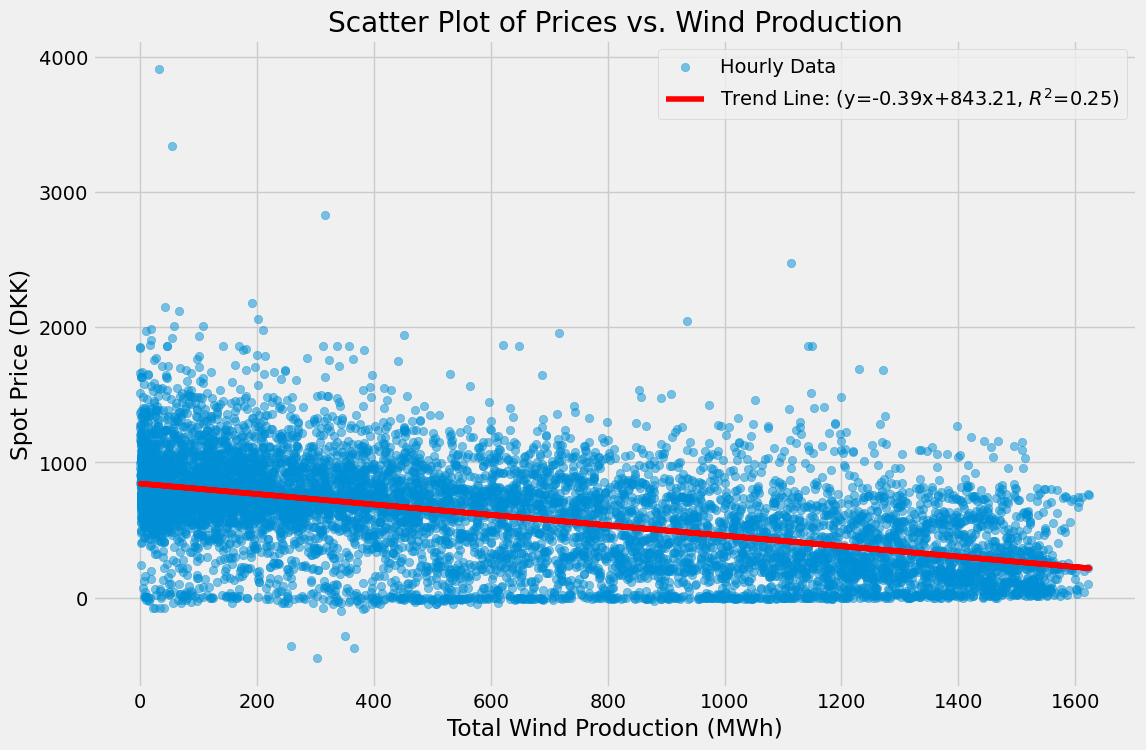

In [9]:
# Data for the scatter plot
x = merged_df['TotalWindProductionMWh']
y = merged_df['SpotPriceDKK']

# Calculate the trend line
slope, intercept, r_value, p_value, std_err = linregress(x, y)
line = slope * x + intercept

# Plotting
plt.figure(figsize=(12, 8))
plt.scatter(x, y, alpha=0.5, label='Hourly Data')
plt.plot(x, line, 'r', label=f'Trend Line: (y={slope:.2f}x+{intercept:.2f}, $R^2$={r_value**2:.2f})')
plt.xlabel('Total Wind Production (MWh)')
plt.ylabel('Spot Price (DKK)')
plt.title('Scatter Plot of Prices vs. Wind Production')
plt.legend()
plt.show()

The scatter plot above shows the relationship between the hourly electricity spot price and the hourly wind production in Denmark. The trend in the plot indicates a slight negative relationship between the spot price and the wind production, as can be seen from the slope of the trend line, which is at -0.39. The trendline is accompanied by a $R^2$ value of 0.25, which indicates that the change in wind production accounts for 25% of the change in the spot price. So although the datapoints are quite widespread in the scatter plot, there does seem to be a quite definitive trend; as total wind production increases, the spot price decreases. 

# Conclusion

This project has analysed data regarding electricity prices and production/consumption in the Danish Price area. The data has been analysed by constructing a table and multiple graphs to explore and illustrate different points. The spot price in the danish electricity market is found to be quite an unpredictable metric, having a high volatilty for all periods, homogeneous variance for some periods, and heterogeneous variance for other periods. The wind production is shown to be quite constant on a daily basis, but very seasonally dependent on a monthly basis, with the wind producion being at its highest in the winter months, and at its lowest in the summer months. Solar production is found to follow the same seasonal trend on both a daily and monthly basis, benefitting from the hours and months with most sunlight. Lastly it is shown, that there is a slight inverse relationship between the spot price and wind production, with the spot price decreasing for an increase in the wind production.